# Data Exploration Template
Use this notebook to perform initial exploratory data analysis (EDA) on new datasets. Fill in each section with project-specific details.

## Notebook Goals
- Document data sources and assumptions
- Inspect schema, data quality, and summary statistics
- Visualize key distributions and relationships
- Capture actionable follow-ups for feature engineering

In [2]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
pd.set_option("display.max_columns", 100)

DATA_DIR = Path(os.environ.get("DATA_DIR", "data"))
print(f"Using data directory: {DATA_DIR.resolve()}")

Using data directory: /usr/src/app/data


## Load Raw Dataset
Update the path, file format, and loader logic to match the dataset you want to explore.
Capture data source details (owner, refresh cadence, quirks) in a markdown cell once confirmed.

In [ ]:
raw_path = DATA_DIR / "comp_data.csv" 
if not raw_path.exists():
    raise FileNotFoundError(f"Update raw_path; {raw_path} not found.")

df = pd.read_csv(raw_path)
df.head()

,timestep,INTERESTingProduct,James_Fund_007
0,0,3.500000,100.000000
1,1,3.511070,100.001203
2,2,3.524691,100.002473
3,3,3.546676,100.003916
4,4,3.565676,100.005457


## Quick Schema & Sample Rows

In [4]:
df.head()

,timestep,INTERESTingProduct,James_Fund_007
0,0,3.500000,100.000000
1,1,3.511070,100.001203
2,2,3.524691,100.002473
3,3,3.546676,100.003916
4,4,3.565676,100.005457


In [5]:
df.sample(5, random_state=42)

,timestep,INTERESTingProduct,James_Fund_007
1860,1860,4.450559,100.107105
353,353,2.846007,99.935780
1333,1333,3.981986,99.705569
905,905,3.437438,99.569399
1289,1289,3.895905,99.672936


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestep            2000 non-null   int64  
 1   INTERESTingProduct  2000 non-null   float64
 2   James_Fund_007      2000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [6]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
timestep,2000.0,999.500000,577.494589,0.000000,499.750000,999.500000,1499.250000,1999.000000
INTERESTingProduct,2000.0,3.568824,0.600829,2.297710,3.003411,3.670313,4.111866,4.532473
James_Fund_007,2000.0,99.840566,0.186717,99.566293,99.650652,99.848405,100.008425,100.201642


## Data Quality Checks
Track columns with high missingness or unusual values. Add commentary below.

In [6]:
missing = df.isna().mean().sort_values(ascending=False)
missing[missing > 0].to_frame('missing_rate')

,missing_rate


In [7]:
cardinality = df.nunique().sort_values(ascending=False)
cardinality.to_frame('unique_values')

,unique_values
timestep,2000
INTERESTingProduct,2000
James_Fund_007,2000


## Numeric Feature Distributions
Visualize key numeric features. Replace the selection logic as needed.

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

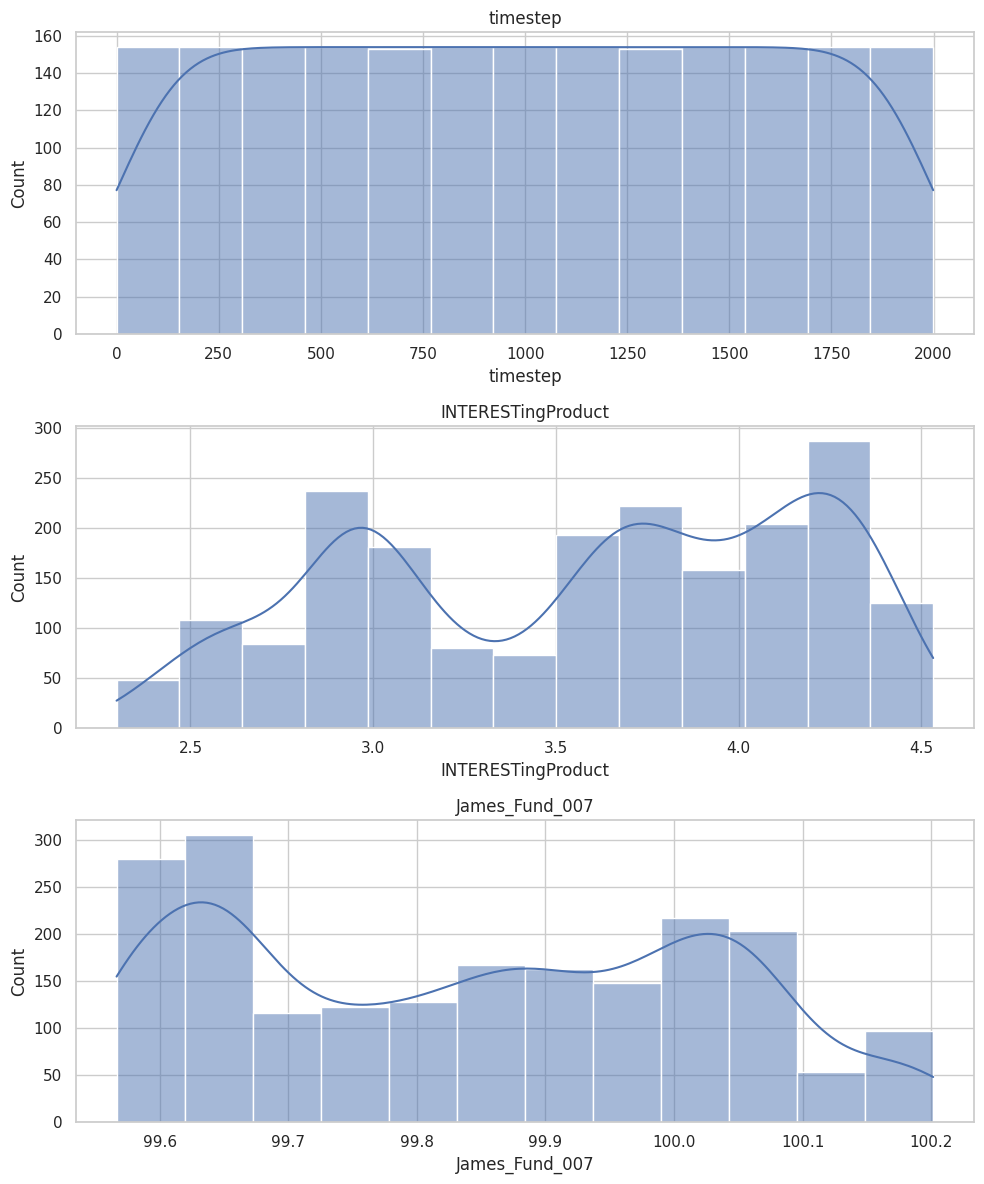

In [8]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
selected_numeric = numeric_cols[:6]  # TODO: curate this list

fig, axes = plt.subplots(nrows=len(selected_numeric), ncols=1, figsize=(10, 4 * len(selected_numeric)))
if not isinstance(axes, np.ndarray):
    axes = np.array([axes])
for ax, col in zip(axes, selected_numeric):
    sns.histplot(df[col].dropna(), ax=ax, kde=True)
    ax.set_title(col)
plt.tight_layout()

## Correlations & Relationships
Use pairplots, heatmaps, or custom charts to highlight important relationships.

Text(0.5, 1.0, 'Numeric Feature Correlation Heatmap')

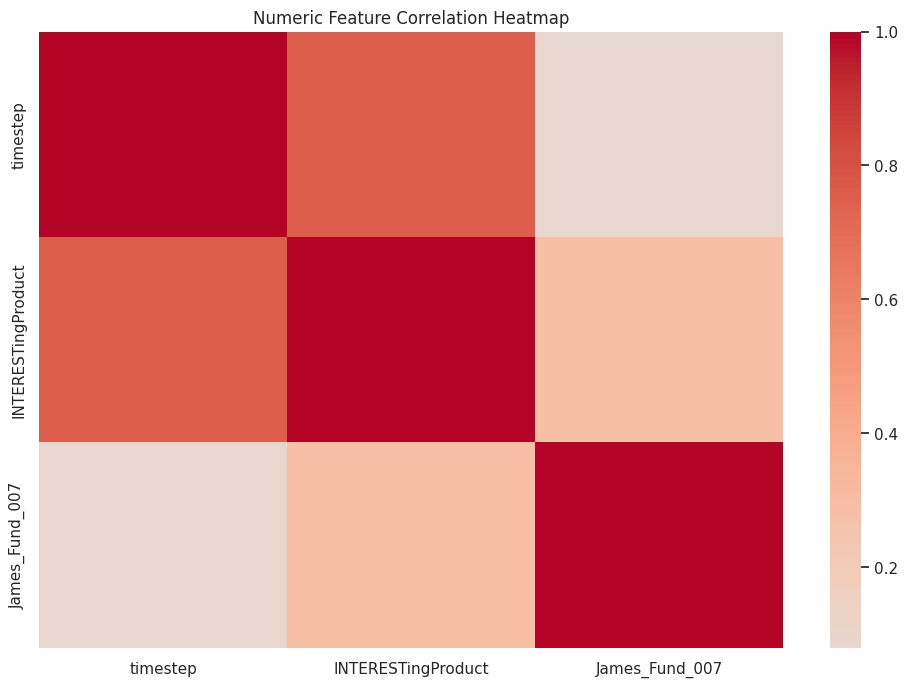

In [9]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Numeric Feature Correlation Heatmap')

## Categorical Feature Summary
Inspect top categories and their frequencies for categorical columns.

In [10]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
summary = {}
for col in categorical_cols[:5]:  # TODO: curate list
    summary[col] = df[col].value_counts(dropna=False).head(10)
summary

{}

## Time-Based Checks (Optional)
If the dataset has a temporal dimension, convert to datetime and inspect recency, seasonality, and missing spans.

In [ ]:
# Example: df['timestamp'] = pd.to_datetime(df['timestamp'])
# df.set_index('timestamp').resample('1D').size().plot(figsize=(12, 4))
# plt.title('Daily Record Volume')

## Findings & Next Actions
Summarize key takeaways and follow-ups for modeling or data engineering.
- **Data quality:** TODO
- **Feature ideas:** TODO
- **Risks/Gaps:** TODO